## Decision Trees & Random Forest

- Pros:
    - Non-parametric.
    - Flexible enough to fit the multi-period data.
    - Both training and predicton are fast. Can be parallalized.
    - Multiple trees allow for a probabilistic classification
    - Very flexible compared to model that underfits
- Cons:
    - Results are not easily interpretable


- Before, we have looked at 2 different type of classifier:
    - Generative: Naive Bayes
    - Discriminative: SVM

- Ensemble method: Aggregate the results of an esemble of simpler estimators

- **Random Forest** = Ensemble learner built on **decision trees**

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/Users/nicolas/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/nicolas/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

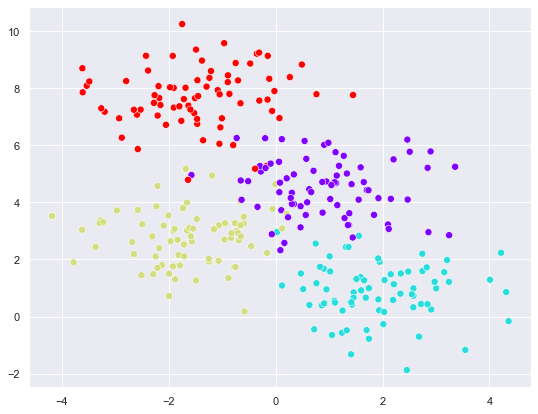

In [7]:
## Decision Tree

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, # Based on Gaussian distribution
                  centers = 4,
                  random_state=0,
                  cluster_std=1.0)

fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

- Iterativly split the data along one axis according to some quantitative criteria.
- At each stage, assign the label of the new region according to a majority vote of points within it

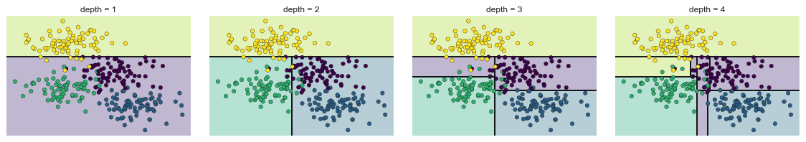

- At stage = 2, there is no need to split the *yellow* region as the region only contains yellow datapoints. Otherwise, at each stage, EVERY region is split along one axis

In [44]:
np.c_?

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

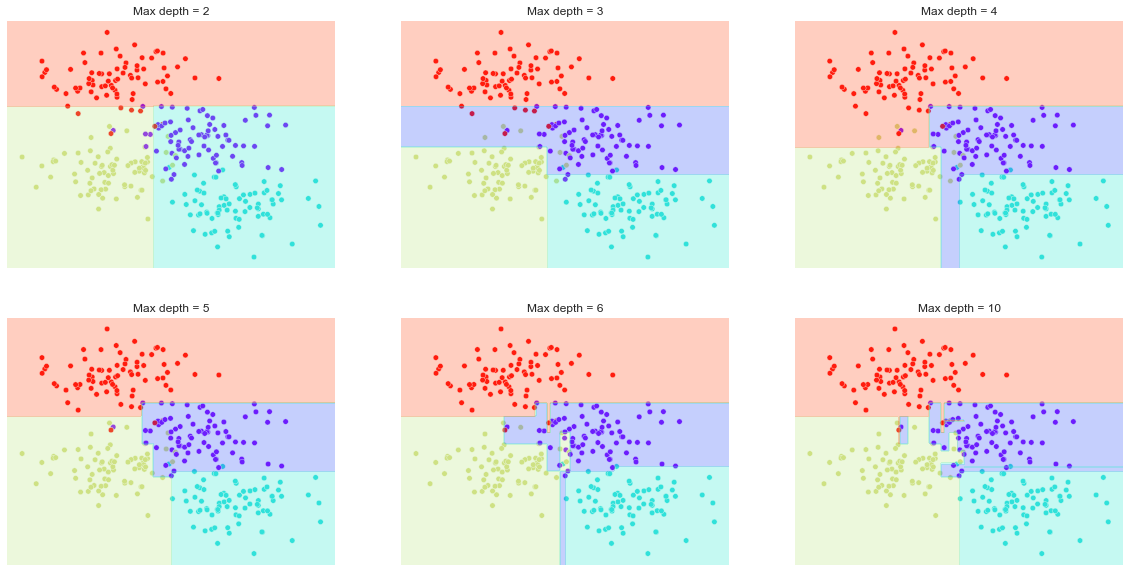

In [92]:
# Fit decision tree to our data
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

# Method to visualize the output of the decision tree model
def visualize_classifier(model, X, y, ax=None, cmap="rainbow"):
    # Get the current ax or create one if necessary
    ax = ax or plt.gca()
    
    # Plot the training data
    sns.scatterplot(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, ax=ax)
                    #clim=(y.min(), y.max()), # Set the color limit
                    #zorder=3)
    # Set axis properties
    ax.axis('tight') # Set limits just large enough to show all the data
    ax.axis('off') # Turn off axis lines and labels
    x_lim = ax.get_xlim() # Return a tuple (x_min, x_max)
    y_lim = ax.get_ylim()
    
    # Fit the estimator
    model.fit(X, y)
    # Compute a grid in order to plot a contour plot
    x_grid, y_grid = np.meshgrid(np.linspace(*x_lim, num=200),# lim is unpacked
                                 np.linspace(*y_lim, num=200))
    ## print(f"Shape of x_grid: {x_grid.shape} // Shape of y_grid {y_grid.shape}")
    # Compute the prediction for all points on the grid
    ## print(f"Shape of x raveled: {x_grid.ravel().shape} // Shape of y raveled: {y_grid.ravel().shape}")
    # np.c_ = concatenate along second axis (4'000,) -> (4'000, 1). After concatenation (4'000, 2).
    # It is needed to call model.predict()
    ## print(f"Shape of np.c_[x_grid.ravel(), y_grid.ravel()] {np.c_[x_grid.ravel(), y_grid.ravel()].shape}")
    Z = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape) # Restore original shape
    ## print(f"Shape of Z: {Z.shape}")
    ## print(f"Unique values in Z:{np.unique(Z.ravel())} ")
    
    # Create a contour plot with the results
    n_classes = len(np.unique(y))
    ## print(f"Number of different classes {n_classes}")
    ## print(f"Levels: {np.arange(n_classes + 1) -0.5}")
    ax.contourf(x_grid, y_grid, Z,
                levels=np.arange(n_classes + 1) -0.5, # Which line to plots (between each classes)
                cmap = cmap,
                alpha=0.3,
                # clim = (y.min(), y.max()),
                #zorder=1
                )
    
    #ax.set(xlim=x_lim, ylim=y_lim)
    
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
max_depth = [2, 3, 4, 5, 6, 10]

for idx, ax in enumerate(axes.flat):
    ax.set_title(f"Max depth = {max_depth[idx]}")
    visualize_classifier(DecisionTreeClassifier(max_depth = max_depth[idx]), X, y, ax)
                
    
    

In [133]:
BaggingClassifier?

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


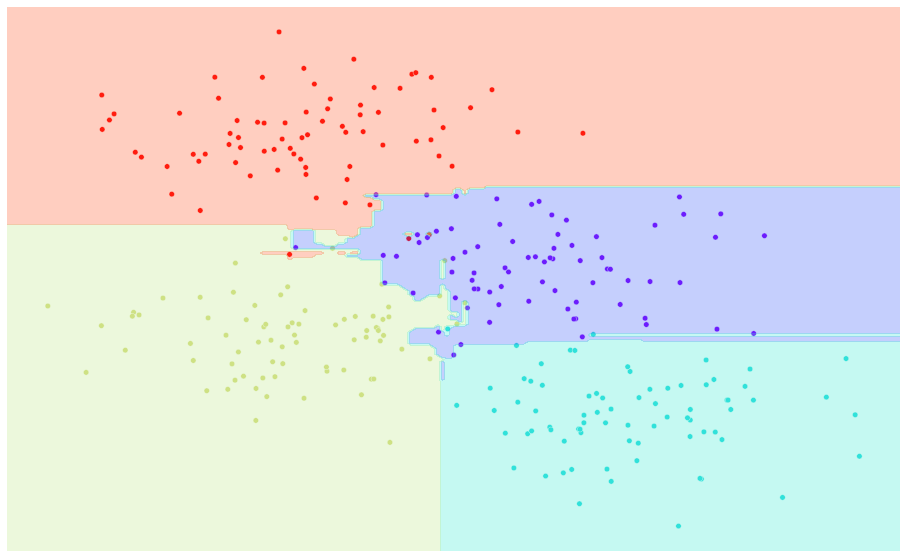

In [93]:
## Ensemble of Estimator: Random Forests

# Avoid over-fitting
# -> Use information from many tree to "fix" the inconsistencies regions
# Bagging: Multiple overfitting estimators can be combined(average) to reduce the effect of this overfitting

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# BaggingClassifier = Ensemble estimator that fits base classifiers each on RANDOM subsets
# of the original dataset and then aggregate their individual predictions

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, # Pass only 1 model, will be used to fit random subset of dataset
                        n_estimators=100, # Number of base estimators in the ensemble
                        max_samples=0.8 # Number of samples to draw from X to train EACH estimator (0.8 * X.shape[0])
                        )
bag.fit(X, y)

fig, ax = plt.subplots(figsize=(16, 10))
visualize_classifier(bag, X, y)

# Can introduced more randomization in the model:
# e.g. how the splits are chosen, which feature to split on

# In sklearn, such an optimized ensemble of randomized decision trees is implements in the RandomForestClassifier
# It takes care of all the randomization automatically.

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


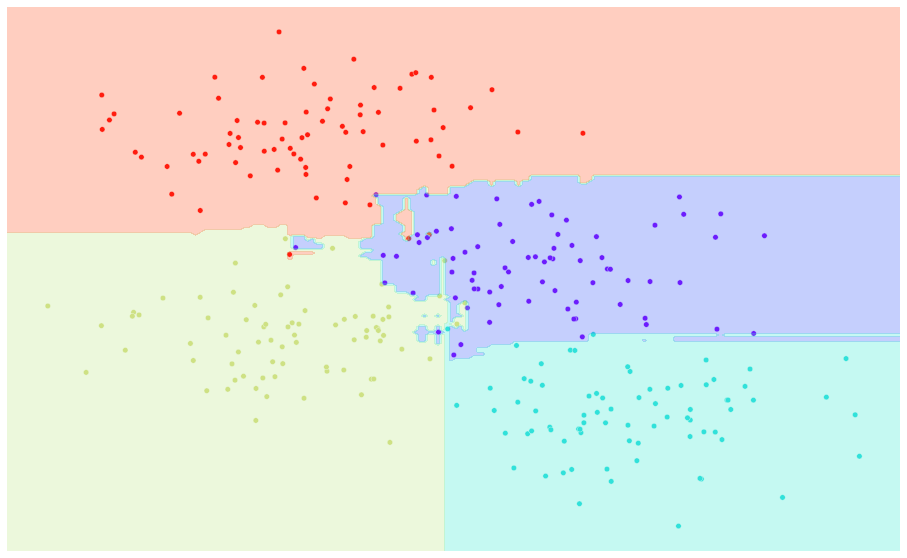

In [98]:
# Optimized Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

fig, ax = plt.subplots(figsize=(16, 10))
visualize_classifier(model, X, y)

In [123]:
RandomForestRegressor?

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

<AxesSubplot:>

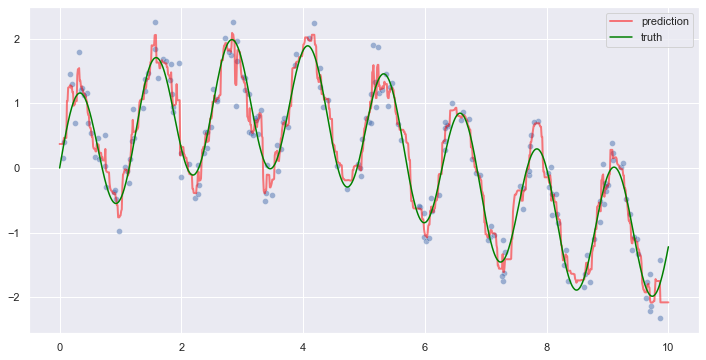

In [132]:
## Random Forest for Regression

from sklearn.ensemble import RandomForestRegressor

rng = np.random.RandomState(42)
x = 10*rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)

# Plot y versus x as markers with attached errorbars
fig, ax = plt.subplots(figsize = (12, 6))
sns.scatterplot(x, y, alpha=0.5)
# ax.errorbar(x, y, 0.3, fmt='o') # Arbitrary error bar length of 0.3

# Try to find the best regression curve with RandomForest
forest = RandomForestRegressor(n_estimators=200) # Number of trees in the forest
forest.fit(x[:, np.newaxis], y)

x_test = np.linspace(0, 10, 1000)
y_test = model(x_test, sigma=0) # sigma = 0 to disable the noise
y_model = forest.predict(x_test[:, np.newaxis])

sns.lineplot(x_test, y_model, color='red', label='prediction', alpha = 0.5, linewidth = 2)
sns.lineplot(x_test, y_test, color='green', alpha = 1, label='truth')


In [113]:
# Example: Random Forest Classifier
from sklearn.datasets import load_digits
digits = load_digits()



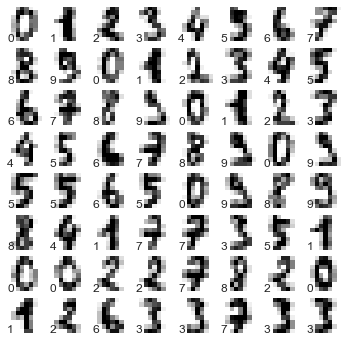

In [158]:
# Visualize a few pictures
fig, axes = plt.subplots(8, 8, figsize=(6, 6))

for idx, ax in enumerate(axes.flat):
    ax.imshow(digits.images[idx], cmap=plt.cm.binary)
    # Label the images with truth value
    ax.text(0, 0, digits.target[idx], transform=ax.transAxes)
    # Remove xticks and yticks
    ax.set_axis_off()

X_train shape: (1347, 64)
X_test shape: (450, 64)
y_train shape: (1347,)
y_test shape: (450,)
Accuracy of the model:  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



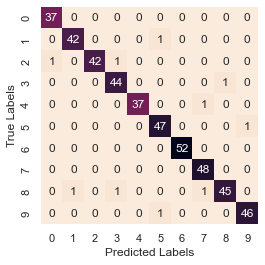

In [175]:
# Classify the digits using a Random Forest

# Make predictions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
forest = RandomForestClassifier(n_estimators=1000)
forest.fit(X_train, y_train)
y_model = forest.predict(X_test)


# Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy of the model: ", accuracy_score(y_model, y_test))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_model)
sns.heatmap(conf_matrix,
            square=True,
            annot=True,
            cbar = False,
            fmt='d', # String formatted code
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,
            cmap = sns.cm.rocket_r)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

from sklearn import metrics
print(metrics.classification_report(y_model, y_test))

#### Concept Summary:

- Decision Tree: Classication + Regression
- Ensemble methods:
    - Bagging: Combine multiple overfitting models to reduce the effect of overfitting
    - Random Forest = Ensemble of randomized decision tree